In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# увеличим количество отображаемых столбцов
pd.set_option("display.max_columns", None)
# увеличим количество отображаемых рядов
pd.set_option("display.max_rows", 500)
# увеличим ширину столбцов
pd.options.display.max_colwidth = 250

# отключаем экспоненциальное представление
pd.set_option("display.float_format", lambda x: "%.2f" % x)

import numpy as np

from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as shc
from tslearn import metrics
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import MinMaxScaler

# Иерархическая кластеризация

In [2]:
# Create a dictionary containing three lists: "x", "y", and "phi"
data_dict = {
    "x": [0, 1, 3, 4, 3, 2.5, 1, 4],  # x-coordinates
    "y": [1, 3, 2, 1, 1, 0.5, 2, 0],  # y-coordinates
    "phi": [10, 11, 8, 7, 9, 7, 10, 9],  # values of phi
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(data_dict)

# Display the DataFrame
df

,x,y,phi
0,0.00,1.00,10
1,1.00,3.00,11
2,3.00,2.00,8
3,4.00,1.00,7
4,3.00,1.00,9
5,2.50,0.50,7
6,1.00,2.00,10
7,4.00,0.00,9


<Axes: >

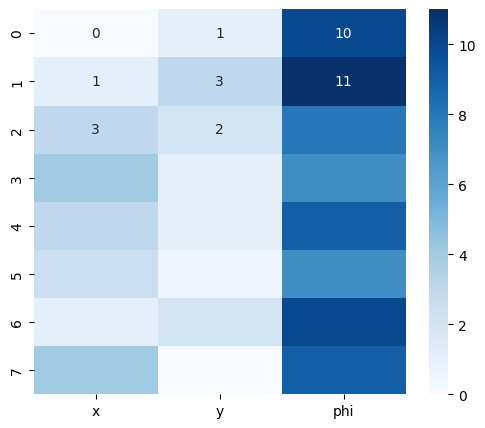

In [3]:
# Set the size of the figure (width, height) in inches
plt.figure(figsize=(6, 5))

# Create a heatmap using seaborn library
# 'df' is the DataFrame to visualize
# 'annot=True' will write the data value into each cell
# 'cmap="Blues"' will use a blue color map for the heatmap
# 'cbar=True' will show a color bar on the right side of the plot
sns.heatmap(df, annot=True, cmap="Blues", cbar=True)

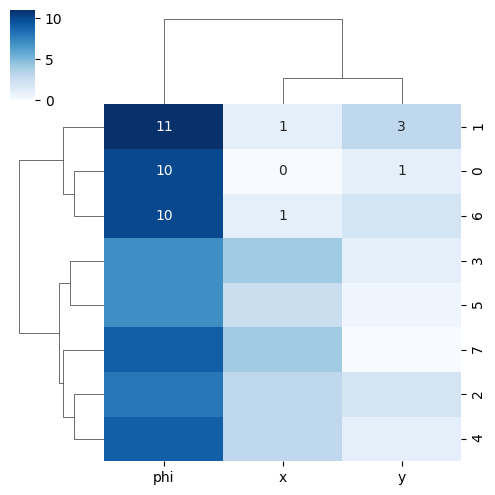

In [4]:
# Generate a clustermap using seaborn
# df: the dataset to be visualized.
# figsize: a tuple that represents the figure size in inches (width, height).
# annot: if True, the data value will be written on each cell.
# cmap: the mapping from data values to color space.
sns.clustermap(df, figsize=(5, 5), annot=True, cmap="Blues")

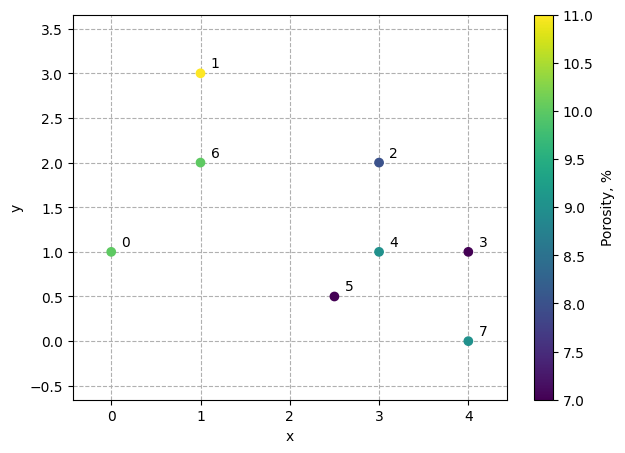

In [5]:
def plot_df(df):
    # Creating a new figure with specified size
    plt.figure(figsize=(7, 5))

    # Creating a scatter plot using the columns 'x' and 'y' of df as coordinates,
    # and the column 'phi' as color values
    plt.scatter(df["x"], df["y"], c=df["phi"], zorder=2)

    # Adding a colorbar to the plot
    colorbar = plt.colorbar()

    # Setting the label of the colorbar
    colorbar.set_label(label="Porosity, %", labelpad=5.5, y=0.5, rotation=90)

    # Setting the coefficients for the shift in labels
    COEF_LABEL = 0.05
    shift_x = df["x"].mean() * COEF_LABEL
    shift_y = df["y"].mean() * COEF_LABEL

    # Adding text labels to each point in the scatter plot
    for i, label in enumerate(df.index):
        plt.text(np.array(df["x"])[i] + shift_x, np.array(df["y"])[i] + shift_y, label)

    # Setting the aspect ratio of the plot to be equal
    plt.axis("equal")

    # Setting the coefficients for the shift in plot limits
    COEF_SHIFT = 10
    plt.xlim(df["x"].min() - shift_x * COEF_SHIFT, df["x"].max() + shift_x * COEF_SHIFT)
    plt.ylim(df["y"].min() - shift_y * COEF_SHIFT, df["y"].max() + shift_y * COEF_SHIFT)

    # Adding labels to the x and y axes
    plt.xlabel("x")
    plt.ylabel("y")

    # Adding a grid to the plot
    plt.grid(ls="--", zorder=1)


# Calling the function with the dataframe 'df' as an argument
plot_df(df)

In [6]:
# Instantiate the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler object to the data in df
scaler = scaler.fit(df)

# Transform the data in df using the fitted scaler, which scales the data to a range of 0 to 1
df_scaled = scaler.transform(df)

# Convert the scaled data back into a DataFrame and use the original column names
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,x,y,phi
0,0.00,0.33,0.75
1,0.25,1.00,1.00
2,0.75,0.67,0.25
3,1.00,0.33,0.00
4,0.75,0.33,0.50
5,0.62,0.17,0.00
6,0.25,0.67,0.75
7,1.00,0.00,0.50


Существуют различные способы найти расстояние между сэмплами/кластерами.
Метрики расстояния/похожести могут быть:
- `Euclidean distance`
    - $\sqrt{(\textrm{difference in sample 1})^2 + \textrm{...} + (\textrm{difference in sample n})^2}$
    - Для #1 и #2 сэмплов $\sqrt{(0 - 0.25)^2 + (0.33 - 1)^2 +(0.75-1)^2}$

- `Manhattan distance`
    - $\mid{\textrm{difference in sample 1}} \mid + \textrm{...} + \mid{\textrm{difference in sample n}} \mid$
- etc.

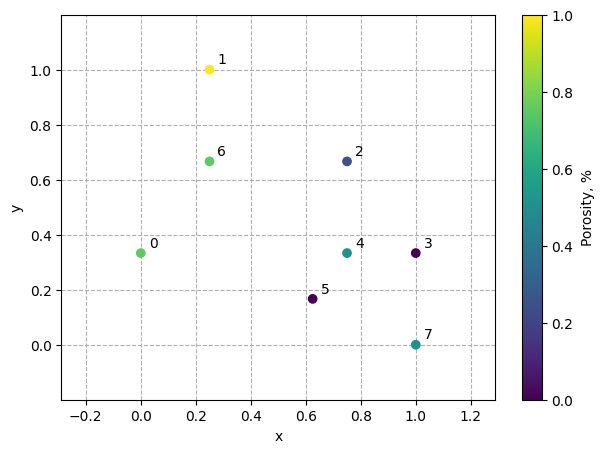

In [7]:
plot_df(df_scaled)

Можно сравнивать каждый новый сэмпл используя:
- Среднее значение в кажом кластере (`centroid`)
- Ближайшую точку (`single`)
- Самую дальнюю точку (`complete`)
- etc.

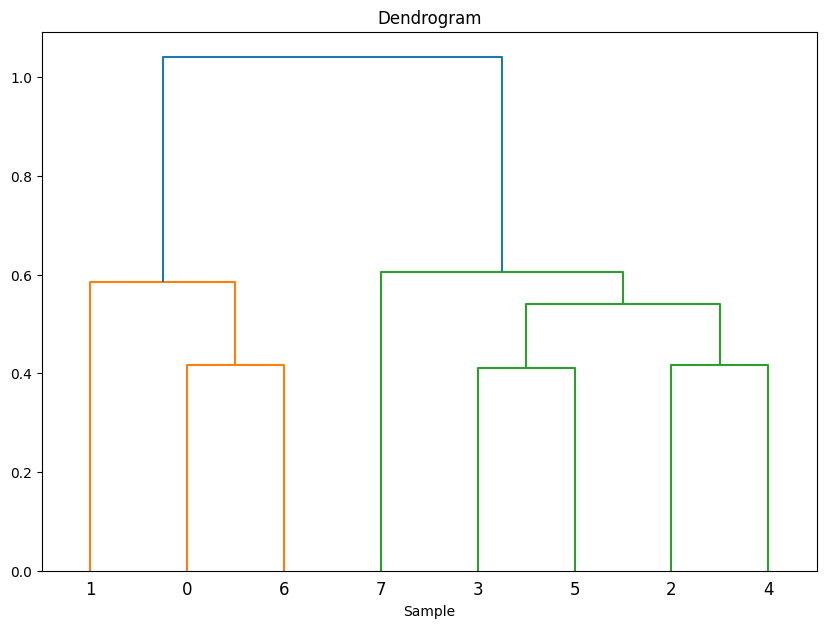

In [8]:
plt.figure(figsize=(10, 7))

# We are setting the title of the plot
plt.title("Dendrogram")

# We perform hierarchical clustering on the scaled data.
# We use the average linkage method and euclidean distance as the metric
links = shc.linkage(df_scaled, method="average", metric="euclidean")

# We create a dendrogram of the hierarchical clustering
dend = shc.dendrogram(links, orientation="top")
plt.xlabel("Sample")
plt.show()

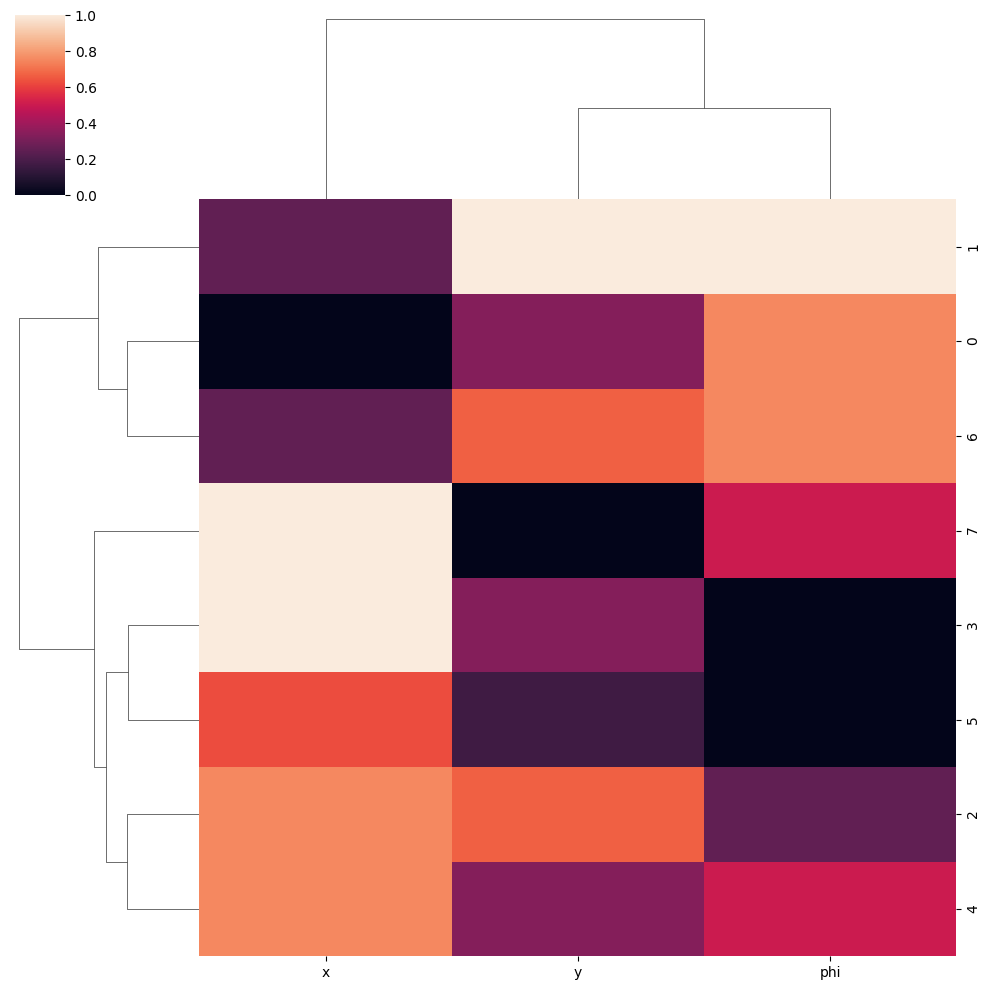

In [9]:
# 'df_scaled' is a pandas DataFrame that has been preprocessed and scaled.

# 'sns.clustermap' creates a hierarchically-clustered heatmap.
# This is useful for understanding the relationship between different rows and columns in the DataFrame.

# The 'method' parameter determines the linkage method for the hierarchical clustering.
# 'average' linkage computes the average distance between clusters before deciding where to make the hierarchical cut.

# The 'metric' parameter determines the distance metric for the hierarchical clustering.
# 'euclidean' is the most common distance metric, which is simply the straight line distance between two points.

sns.clustermap(df_scaled, method="average", metric="euclidean")

# DTW
Алгоритм динамической трансформации временной шкалы (`DTW-алгоритм`, от англ. dynamic time warping) — это метод, позволяющий находить оптимальное соответствие между временными последовательностями. Впервые он был применен в распознавании речи для определения, как два речевых сигнала представляют одну и ту же исходную произнесённую фразу.

Временные ряды (time series) — это широко распространенный тип данных, которые можно встретить почти в любой научной области, и сравнение двух последовательностей является стандартной задачей. Для вычисления отклонения достаточно простого измерения расстояния между компонентами двух последовательностей (Евклидово расстояние). Однако, часто две последовательности имеют приблизительно одинаковые общие формы, но эти формы не выровнены по оси X. Чтобы определить подобие между такими последовательностями, нам приходится "деформировать" ось времени одной (или обеих) последовательности для достижения лучшего выравнивания.

Измерение расстояния между двумя временными рядами необходимо для определения их подобия и классификации. Евклидова метрика служит эффективным способом измерения для двух временных последовательностей; это просто сумма квадратов расстояний от каждой n-ой точки одной последовательности до n-ой точки другой. Однако использование евклидова расстояния имеет существенный недостаток: если два временных ряда идентичны, но один из них незначительно смещен во времени (вдоль оси времени), то евклидова метрика может посчитать, что ряды сильно отличаются друг от друга. DTW-алгоритм был создан для того, чтобы преодолеть этот недостаток и предоставить наглядное измерение расстояния между рядами, игнорируя как глобальные, так и локальные сдвиги на временной шкале.

Алгоритм dynamic time warping (DTW) представляет собой метод сравнения двух временных рядов, которые могут различаться по скорости и длительности. Например, DTW может использоваться для сравнения аудиозаписей или движений тела во времени.

DTW работает путем вычисления расстояния между двумя временными рядами, измеряя, насколько сильно один временной ряд отличается от другого. Основная идея заключается в том, что DTW находит оптимальное соответствие между точками двух рядов, учитывая их различные скорости и длительности.

Алгоритм DTW можно разделить на следующие этапы:

1. `Вычисление матрицы расстояний`. Сначала вычисляется матрица расстояний, которая показывает расстояние между каждой точкой первого ряда и каждой точкой второго ряда. Эта матрица позволяет определить, насколько сильно каждая точка одного ряда соответствует каждой точке другого ряда.
2. `Вычисление матрицы накопленных расстояний`. Затем вычисляется матрица накопленных расстояний, которая определяет минимальное расстояние между точками первого и второго рядов, если соответствующие точки сопоставляются друг с другом. Эта матрица строится путем последовательного накопления расстояний между точками первого и второго рядов, начиная с первой точки и заканчивая последней.
3. `Нахождение оптимального пути`. В итоге DTW находит оптимальный путь через матрицу накопленных расстояний, который соответствует наилучшему сопоставлению точек первого и второго рядов. Этот путь строится путем выбора последовательности точек, начиная с первой точки первого ряда и заканчивая последней точкой второго ряда, с минимальным накопленным расстоянием.

Несмотря на то что алгоритм успешно применяется во многих областях, он может давать неправильные результаты. Алгоритм может попытаться объяснить непостоянство оси y с помощью трансформации оси x. Это может привести к выравниванию, при котором одной точке первой последовательности ставится в соответствие большая подгруппа точек второй последовательности. Другая проблема заключается в том, что алгоритм может не найти очевидное выравнивание двух рядов из-за того, что особая точка (пик, впадина, плато, точка перегиба) одного ряда расположена немного выше или ниже соответствующей ей особой точки другого ряда.

Давайте визуализируем 2 кривые и применим к ним `DTW`, чтобы соединить их при этом минимизруя расстояние между двумя time series не обращая внимание на сдвиги по шкале x

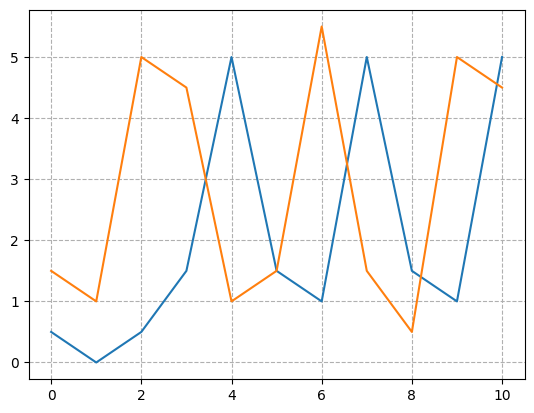

In [10]:
# Defining first array of y-coordinates for the first curve
s_y1 = np.array(
    [
        0.5,
        0.0,
        0.5,
        1.5,
        5,
        1.5,
        1,
        5,
        1.5,
        1,
        5,
    ]
)

# Defining second array of y-coordinates for the second curve
s_y2 = np.array(
    [
        1.5,
        1,
        5,
        4.5,
        1,
        1.5,
        5.5,
        1.5,
        0.5,
        5,
        4.5,
    ]
)

# Plotting the first curve
plt.plot(s_y1)

# Plotting the second curve
plt.plot(s_y2)

# Adding a grid to the plot with a dashed line style
plt.grid(ls="--")

/var/folders/bn/2mlk76w958s_gt1p07mjttdw0000gn/T/ipykernel_73342/2252728262.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


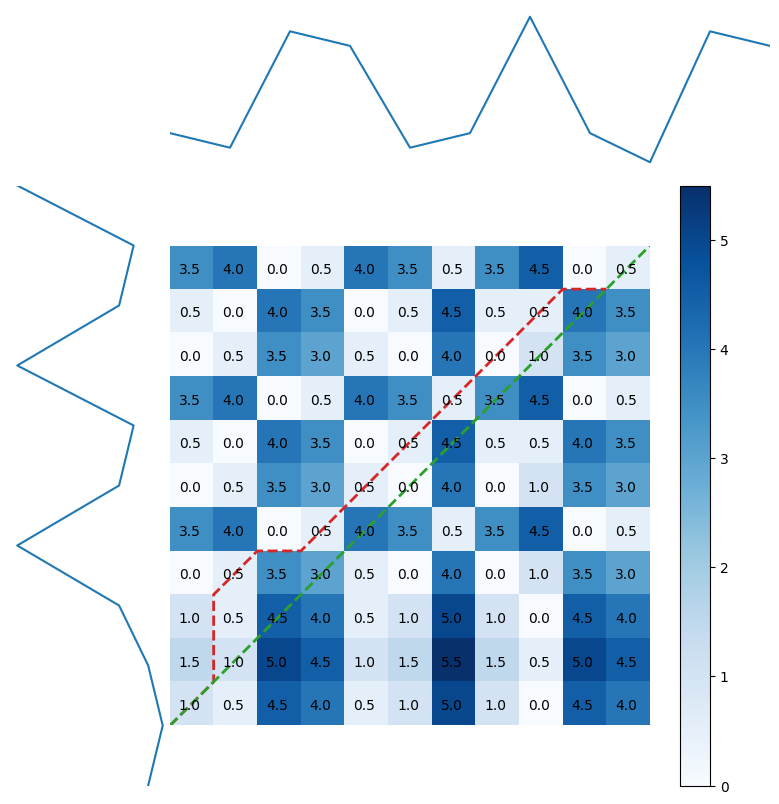

In [11]:
# Reshape the data arrays to the required format.
s_y1 = np.array(s_y1).reshape((-1, 1))
s_y2 = np.array(s_y2).reshape((-1, 1))

# Get the size of the reshaped array
sz = s_y1.shape[0]

# Compute the Dynamic Time Warping (DTW) similarity measure between two temporal sequences.
path, sim = metrics.dtw_path(s_y1, s_y2)

# Initialize the figure
fig = plt.figure(figsize=(8, 8))

# Define the axes
left, bottom = 0.2, 0.5
w_ts = h_ts = 0.2
left_h = left + w_ts  # + 0.02
width = height = 0.75
bottom_h = bottom + height + 0.02

rect_s_y = [left, bottom, w_ts, height]
rect_gram = [left_h, bottom, width, height]
rect_s_x = [left_h, bottom_h, width, h_ts]

# Create the axes objects
ax_gram = plt.axes(rect_gram)
ax_s_x = plt.axes(rect_s_x)
ax_s_y = plt.axes(rect_s_y)

# Compute the distance between each pair of the two collections of inputs
mat = cdist(s_y1, s_y2)

# Define grid size and grid parameters
size = 11
x_start = 0
x_end = 10
y_start = 0
y_end = 10
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=True)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=True)

# Place text labels on the grid
for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = mat[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax_gram.text(text_x, text_y, label, color="black", ha="center", va="center")

# Define the extent of the plot and plot the distance matrix
extent = [x_start, x_end + 1, y_start, y_end + 1]
im = ax_gram.imshow(
    mat, extent=extent, origin="lower", interpolation="None", cmap="Blues"
)

# Set plot properties and plot the DTW path
ax_gram.axis("off")
ax_gram.autoscale(False)
ax_gram.plot([j for (i, j) in path], [i for (i, j) in path], "C3--", linewidth=2.0)
ax_gram.plot([0, size], [0, size], "C2--", linewidth=2.0)

# Plot the first time series
ax_s_x.plot(np.arange(sz), s_y2)
ax_s_x.axis("off")
ax_s_x.set_xlim((0, sz - 1))

# Plot the second time series
ax_s_y.plot(-s_y1, np.arange(sz))
ax_s_y.axis("off")
ax_s_y.set_ylim((0, sz - 1))

# Add colorbar to the plot
fig.colorbar(im)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

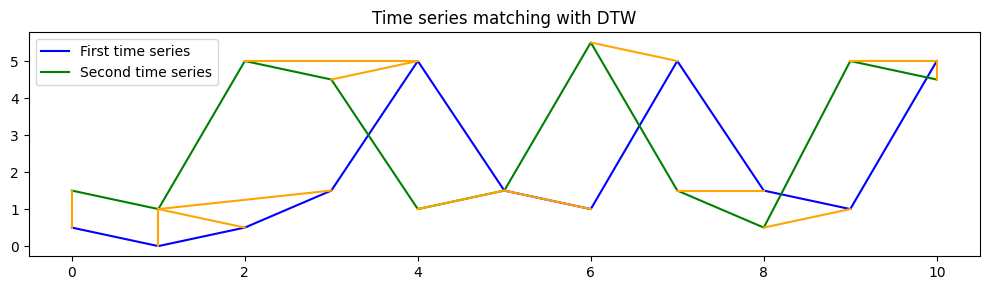

In [12]:
# The 'dataset_scaled' is a numpy array that contains two time series 's_y1' and 's_y2'
dataset_scaled = np.array([s_y1, s_y2])

# We print the shape of the dataset to check its dimensions
dataset_scaled.shape

# Here we calculate the DTW path and similarity between the first dimension of the two time series
# 'dtw_path' is a list of index pairs showing the best alignment between the two time series
# 'sim_dtw' is the DTW similarity measure between the two time series
dtw_path, sim_dtw = metrics.dtw_path(dataset_scaled[0, :, 0], dataset_scaled[1, :, 0])

# Start a new figure for the plot
plt.figure(2, figsize=(10, 3))

# Plot the first time series in blue
plt.plot(dataset_scaled[0, :, 0], "b-", label="First time series")

# Plot the second time series in green
plt.plot(dataset_scaled[1, :40, 0], "g-", label="Second time series")

# For each pair of aligned points in the DTW path,
# draw a line between the corresponding points in the two time series
for positions in dtw_path:
    plt.plot(
        [positions[0], positions[1]],
        [dataset_scaled[0, positions[0], 0], dataset_scaled[1, positions[1], 0]],
        color="orange",
    )

# Add a legend to the plot
plt.legend()

plt.title("Time series matching with DTW")

# Adjust the layout so that all elements fit in the figure
plt.tight_layout()

plt.show()

$$DTW(x, y) = min_{\pi} \sqrt{\sum_{(i,j)\in \pi} d(x_i, y_j)^2},$$

где $\pi = [\pi_0, ..., \pi_K]$ - это путь, удовлетворяющий набору условий:
 - это лист парных индексов $\pi_k = (i_k, j_k)$, где  $0 \leq i_k \lt n$ и $0 \leq j_k \lt m $;
 -  $\pi_0 = (0, 0)$ и $\pi_K = (n-1, m-1)$
для всех $k\gt0$,
 - $\pi_k=(i_k, j_k)$ и $\pi_{k-1}=(i_{k-1}, j_{k-1})$ удовлетворяют следующим неравенствам:
- $i_{k-1} \leq i_k \leq i_{k-1} + 1$
- $j_{j-1} \leq j_k \leq j_{k-1} + 1$


Если совсем упростить:
- Путь - это индексы временных рядов
- Путь может ходить по диагонали, горизонтали и вертикали, 
главное, чтобы был неубывающим по индексам
- Стартуем всегда в начале временных рядов, заканчиваем всегда в конце


Общая формула для расчета кумулятивного расстояния между точакми:
<br>
<br>
$\sqrt{(x_i - y_j)^2 + (min(d[i-1, j-1], d[i-1, j], d[i, j-1]))^2} $, где
<br>
<br>
$min (a, b, c)$ означает выбор минимального значение из представленных внутри скобок,
<br>
<br>
$d[i-1, j]$ означает выбор элемента матрицы находящегося на 1 элемент левее по оси x и на том же месте по оси y по отношению к текущему элементу матрицы
<br>
<br>
Зададим исходные кривые
<br>
`
s1 = np.array([1, 2, 4, 1])
s2 = np.array([1, 5, 4, 2])
`
<br>
и посчитаем несколько частных случаев помня что `s1` находится по оси **y**, а `s2` по **x**:
<br><br>
$\sqrt{(x_1 - y_0)^2 + (min(d[0, 0])^2} = \sqrt{(5 - 1)^2 + 0^2} = \sqrt{16 + 0} = 4 $
<br>
<br>
$\sqrt{(x_2 - y_0)^2 + (min(d[1, 0]))^2} = \sqrt{(4 - 1)^2 + 4^2} = \sqrt{9 + 16} = 5 $
<br>
<br>
$\sqrt{(x_3 - y_0)^2 + (min(d[2, 0]))^2} = \sqrt{(2 - 1)^2 + 5^2} = \sqrt{1 + 25} = 5.1 $
<br>
<br>
$\sqrt{(x_4 - y_3)^2 + (min(d[3, 3], d[4, 2], d[2, 2]))^2} = \sqrt{(2 - 4)^2 + min(1.41, 3.61, 3.61))^2} = \sqrt{4 + (1.41)^2} = 2.45 $
<br>
<br>
Помним, что счет начинается с нуля, а не с единицы [0, 1, 2, 3]. В папке есть файл "dtw.xlsx" в котором можно более детально изучить расчеты.
<br>
#### Итог:
Мы познакомились с тем как работает DTW алгоритм и готовы применять его на реальных данных. DTW позволяет найти оптимальное соответствие между двумя временными рядами, учитывая их скорости и длительности. Этот метод широко применяется в области анализа временных рядов, включая распознавание речи, анализ движения и многих других областях.